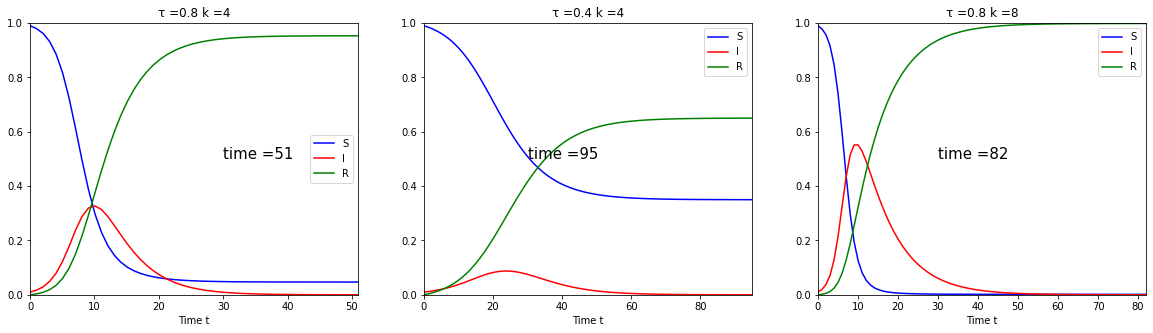

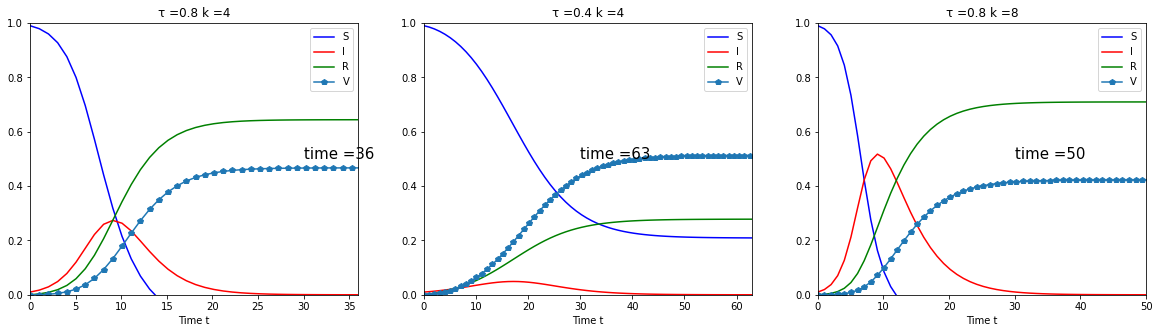

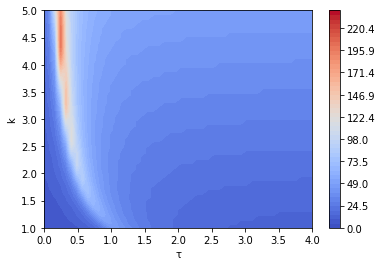

<ipython-input-35-936fac52a4da>:24: RuntimeWarning: divide by zero encountered in double_scalars
  v = 1/(τ*k*0.99)
/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


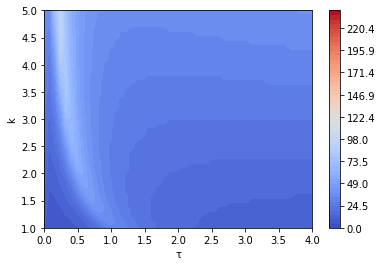

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numba
from scipy.integrate import solve_ivp
from scipy import integrate


t = np.linspace(0, 120, 120)
def derivative(X,t,τ,k):
  S, I, R= X
  dS = -τ*S*I
  dI = τ*S*I - I/k
  dR = I/k
  return np.array([dS, dI, dR])

# 1- np.exp(-(1-S))
# (τ/0.4)/((t+k)**2)
# I/k**2
# I*(1+τ)/(k**2)
# v*S*I / (I+S) 
def derivativeNew(X,t,τ,k):
  S, I, R, V= X
  v = 1/(τ*k*0.99)
  f = v*I*R/(I+R)
  dS = -τ*S*I - f
  dI = τ*S*I - I/k
  dR = I/k
  dV = f
  return np.array([dS, dI, dR, dV])

def plotting():
  fig,ax = plt.subplots(1,3, figsize=(20,5))
  τList, kList = [0.8,0.4,0.8],[4,4,8]
  for i in range(3):
    tmax = 0
    S0 = 0.99
    I0 = 0.01
    R0 = 1-S0-I0
    X0 = S0, I0, R0
    τ, k = τList[i],kList[i]
    res = integrate.odeint(derivative, X0, t,(τ,k))
    S, I, R = res.T
    for j in range(len(I)):
      if I[j] <0.0001:
        tmax=j
        break
    p = ax[i]
    p.plot(t, S,'-b', label='S')
    p.plot(t, I,'-r', label='I')
    p.plot(t, R, '-g', label='R')
    p.set_xlabel('Time t')
    p.set_xlim([0,tmax])
    p.set_ylim([0,1])
    p.set_title("τ =" +str(τ) +" k =" + str(k))
    p.text(30, 0.5, "time ="+ str(tmax),fontsize=15)
    p.legend()
  plt.show();

def plottingNew():
  fig,ax = plt.subplots(1,3, figsize=(20,5))
  τList, kList = [0.8,0.4,0.8],[4,4,8]
  for i in range(3):
    tmax = 0
    S0 = 0.99
    I0 = 0.01
    V0 = 0
    R0 = 1-S0-I0-V0
    X0 = S0, I0, R0, V0
    τ, k = τList[i],kList[i]
    res = integrate.odeint(derivativeNew, X0, t,(τ,k))
    S, I, R, V = res.T
    for j in range(len(I)):
      if I[j] <0.0001:
        tmax=j
        break
    p = ax[i]
    p.plot(t, S,'-b', label='S')
    p.plot(t, I,'-r', label='I')
    p.plot(t, R, '-g', label='R')
    p.plot(t, V, '-p', label='V')
    p.set_xlabel('Time t')
    p.set_xlim([0,tmax])
    p.set_ylim([0,1])
    p.set_title("τ =" +str(τ) +" k =" + str(k))
    p.text(30, 0.5, "time ="+ str(tmax),fontsize=15)
    p.legend()
  plt.show();


plotting()
plottingNew()


def timeF(X,Y):
  tmax = 0
  S0 = 0.99
  I0 = 0.01
  R0 = 1-S0-I0
  X0 = S0, I0, R0
  emptyArray = np.zeros([50,50])
  t = np.linspace(0, 240, 240)
  for i in range(50):
    for j in range(50):
      τ=X[i][j]
      k=Y[i][j]
      res = integrate.odeint(derivative, X0, t,(τ,k))
      S, I, R = res.T
      for f in range(len(I)):
        if I[f] <0.0001:
          emptyArray[i][j]=f
          break
  return emptyArray

def timeFNew(X,Y):
  tmax = 0
  S0 = 0.99
  I0 = 0.01
  V0 = 0
  R0 = 1-S0-I0-V0
  X0 = S0, I0, R0, V0
  emptyArray = np.zeros([50,50])
  t = np.linspace(0, 240, 240)
  for i in range(50):
    for j in range(50):
      τ=X[i][j]
      k=Y[i][j]
      res = integrate.odeint(derivativeNew, X0, t,(τ,k))
      S, I, R, V = res.T
      for f in range(len(I)):
        if I[f] <0.0001:
          emptyArray[i][j]=f
          break
  return emptyArray

def contourPlot(func):
  plt.clf()
  plt.figure
  Tlist = np.linspace(0, 4, 50)
  klist = np.linspace(1, 5, 50)
  Tlist, klist = np.meshgrid(Tlist, klist)
  t = func(Tlist,klist)
  levels = np.linspace(0,240)
  plt.contourf(Tlist, klist, t,levels=levels,cmap='coolwarm');
  plt.xlabel('τ')
  plt.ylabel('k')
  plt.colorbar();
  plt.show()
  

contourPlot(timeF)

contourPlot(timeFNew)
